# Лабораторная работа №3: решение нелинейных уравнений. Выполнил Акинин А.А., студент 431 группы

# Теоретическая часть

Дана функция $f(x)$, необходимо найти корень уравнения $x': f(x') = 0$.

### Метод дихотомии
Надо знать отрезок $[a,b]$, на котором заведомо есть корень, вычисляем значение функции в точках $a$ и $b$ и в точке $c$, которая находится посередите этого отрезка.

### Метод хорд
То же самое, только между $a$ и $b$ проводим прямую - её пересечение с осью $x$ будет точкой $c$.

### Метод Ньютона
Дана начальная точка $x_0$, строим в этой точке касательную к функции, и пересечение этой касательной с осью $x$ будет точкой $x_1$ - и так далее.

### Метод простых итераций
То же самое, что метод Ньютона, но изначально один раз вычисляется производная и потом она используется в итерациях.

***

# Практическая часть 
Для начала введем функцию вычисления производной, так как она понадобится для некоторых методов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Функции, необходимые для обеспечения математического аппарата алгоритмов решения нелинейных уравнений:

In [2]:
# Простая численная производная 
def derivative(func, x, h):
        return (func(x+h) - func(x))/(h)

# Частная производная по первой переменной функции (х)
def partial_x(func, x, y, h):
        return (func(x+h, y) - func(x, y))/h

# Частная производная по второй переменной функции (у)
def partial_y(func, x, y, h):
    return (func(x, y+h) - func(x,y))/h

# Матрица Якоби
def Jacobian_matrix(func1, func2, x, y, h):
    return np.array(
        [[partial_x(func1, x, y, h), partial_y(func1, x, y, h)],
         [partial_x(func2, x, y, h), partial_y(func2, x, y, h)]])

Алгоритмы решения нелинейных уравнений:

In [3]:
def get_root_dich(func, a, b, err=1e-4, iters=1000, debug=False):
    
    # Тривиальный случай: один из краев [a,b] является корнем
    if func(a) == 0:
        return a
    if func(b) == 0:
        return b
    
    c = (a+b)/2
    k = 0
    while abs(c-a) > err:
        
        # Проверка достижения максимального количества итераций
        if k > iters: raise Exception('Exceeded max iterations') 
        k += 1
        
        # Вывод итераций для проверки 
        if debug: print(X)
        
        # Если sgn(func(c))!=sgn(func(b)), то [a,b]=>[c,b]
        if (p_c:=func(c))*func(b) < 0: 
            a = c
            
        # Если sgn(func(c))!=sgn(func(a)), то [a,b]=>[a,c]
        elif p_c*func(a) < 0: 
            b = c
        
        # Если func(c)=0, то сдвинуть немного с
        else: 
            c += err
            continue
        
        c = (a+b)/2
        
    return c

In [4]:
def get_root_hord(func, a, b, err=1e-4, iters=1000, debug=False):
    
    # Тривиальный случай: один из краев [a,b] является корнем
    if func(a) == 0:
        return a
    if func(b) == 0:
        return b
    
    c = a - (b-a)*func(a)/(func(b)-func(a))
    k = 0
    while abs(c-a) > err:
        
        # Проверка достижения максимального количества итераций
        if k > iters: raise Exception('Exceeded max iterations') 
        k += 1
        
        # Вывод итераций для проверки 
        if debug: print(X)
        
        a = c
        c = a - func(a)*(b-a)/(func(b)-func(a))
    
    return c

In [5]:
def get_root_newt(func, x, err=1e-4, iters=1000, debug=False):
    
    # Тривиальный случай: х является корнем
    if func(x) == 0:
        return x
    
    diff, k = 1e10, 0
    while diff > err:
        
        # Проверка достижения максимального количества итераций
        if k > iters: raise Exception('Exceeded max iterations') 
        k += 1
        
        # Вывод результата итераций для проверки 
        if debug: print(x)
        
        # Тупиковый случай: если в x_n точке dy/dx=0, то сдвинуть немного x_n
        if (deriv := derivative(func, x, err)) == 0:
            x += err/2
            deriv = derivative(func, x, err)
        
        x_prev = x
        x = x - func(x)/deriv
        diff = abs(x-x_prev)
        
    return x

In [6]:
def get_root_simple_iter(func, x, err=1e-4, iters=1000, debug=False):
    
    # Тривиальный случай: х является корнем
    if func(x) == 0:
        return x
    
    # Тупиковый случай: если в x_0 точке dy/dx=0, то сдвинуть немного x_0
    if (start_deriv := derivative(func, x, err)) == 0:
        x += err/2
        start_deriv = derivative(func, x, err)
    
    diff, k = 1e10, 0
    while diff > err:
        
        # Проверка достижения максимального количества итераций
        if k > iters: raise Exception('Exceeded max iterations') 
        k += 1
        
        # Вывод итераций для проверки 
        if debug: print(X)
        
        x_prev = x
        x = x - func(x)/start_deriv
        diff = abs(x-x_prev)
    
    return x

In [7]:
def system_newt_solve(func1, func2, X, err=1e-4, iters=1000, debug=False):
    
    # Тривиальный случай: X является решением
    if func1(X[0], X[1]) == 0 and func2(X[0], X[1]) == 0:
        return X
    
    diff_X = np.array([1e10, 1e10])
    k = 0
    while np.sqrt(diff_X.dot(diff_X)) > err:
        
        # Проверка достижения максимального количества итераций
        if k > iters: raise Exception('Exceeded max iterations') 
        k += 1
        
        # Вывод итераций для проверки 
        if debug: print(X)
        
        # Вычисление обратной матрицы Якоби
        J = Jacobian_matrix(func1, func2, X[0], X[1], err/10)
        
        # Тупиковый случай: определитель матрицы Якоби равен нулю
        if np.linalg.det(J) == 0:
            X[0] += err/2
            X[1] += err/2
            continue
        J_inv = np.linalg.inv(J)
        
        F = np.array([func1(X[0], X[1]), func2(X[0], X[1])])
        
        prev_X = X
        X = X - np.dot(J_inv, F)
        diff_X = X - prev_X
        
    return X

***

# Задание 1
Выполните определение корней аналитически и найдите один из корней методами дихотомии и хорд с абсолютной погрешностью $10^{-4}$. 

$$ 3x^4 + 4x^3 - 12x^2 - 5 = 0 $$



## Решение

Аналитические корни: 

$x_1=-2.82385308322$

$x_2=1.59208806469$


Задаем функцию и точки для отрезека, в котором будем искать корни.

In [8]:
func1 = lambda x: 3*x**4 + 4*x**3 - 12*x**2 - 5

true_root1_1 = -2.82385308322
true_root1_2 = 1.59208806469

График функции $y(x) = 3x^4 + 4x^3 - 12x^2 - 5$

Text(0.1, 21, '1.59208806469')

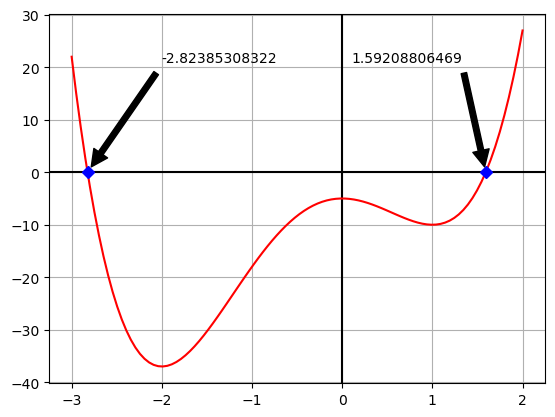

In [9]:
X_span = np.linspace(-3, 2, 100)
Y = func1(X_span)

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid(True)

plt.plot(X_span, Y, label='', color='r')
plt.plot([true_root1_1,], [0,], label='', color='b', marker='D')
plt.plot([true_root1_2,], [0,], label='', color='b', marker='D')

plt.annotate(f'{true_root1_1}', xy=(true_root1_1, 0), xytext=(-2, 21), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f'{true_root1_2}', xy=(true_root1_2, 0), xytext=(0.1, 21), arrowprops=dict(facecolor='black', shrink=0.05))


Численное решение:

In [10]:
a1, b1 = -3, 2

In [11]:
root1 = get_root_dich(func1, a1, b1)
print(f'Корень методом дихотомии: {root1:0.4f}', )

root2 = get_root_hord(func1, a1, b1)
print(f'Корень методом хорд: {root2:0.4f}')

Корень методом дихотомии: 1.5921
Корень методом хорд: 1.5921


***

# Задание 2
Выполните определение корней аналитически и найдите один из корней методами простых итераций и Ньютона с абсолютной погрешностью $10^{-4}$. 

$$ x + \ln{(1+x)} - 1.5 = 0 $$



## Решение

Аналитические корни: $x_1=0.872647040417$


Задаем функцию и точки для отрезека, в котором будем искать корни.

In [12]:
func2 = lambda x: x + np.log(1+x) - 1.5

true_root2 = 0.872647040417

График функции $y(x) = x + \ln{(1+x)} - 1.5 = 0 $

Text(0.6, -2, '0.872647040417')

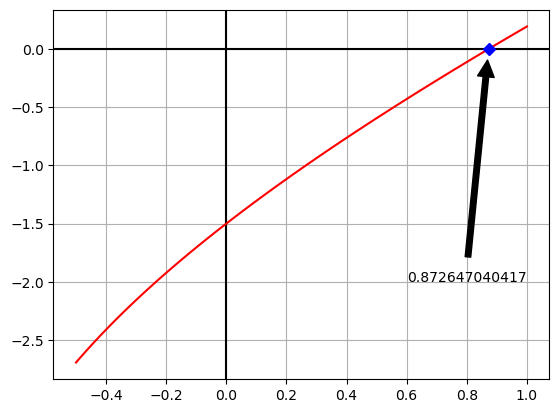

In [13]:
X_span = np.linspace(-0.5, 1, 100)
Y = func2(X_span)

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid(True)

plt.plot(X_span, Y, label='', color='r')
plt.plot([true_root2,], [0,], label='', color='b', marker='D')

plt.annotate(f'{true_root2}', xy=(true_root2, 0), xytext=(0.6, -2), arrowprops=dict(facecolor='black', shrink=0.05))


Численное решение:

In [14]:
x_0 = np.pi

In [15]:
root3 = get_root_newt(func2, x_0)
print(f'Корень методом Ньютона: {root3:0.4f}')

root4 = get_root_simple_iter(func2, x_0)
print(f'Корень методом простых итераций: {root4:0.4f}')

Корень методом Ньютона: 0.8726
Корень методом простых итераций: 0.8727


***

# Задание 3
Найдите одно из решений системы уравнений методом Ньютона с абсолютной погрешностью $10^{-4}$. 

\begin{equation}
\begin{cases}
x^2 + (y-1)^2 = 1 \\
x^3 + y^3 = 2
\end{cases}
\end{equation}



## Решение

Аналитические корни: 

$x_1=1,y_1=1$

$x_2=-0.914893013993, y_2=1.4036938709$

In [16]:
func1 = lambda x, y: x**2 + (y-1)**2 - 1
func2 = lambda x, y: x**3 + y**3 - 2

true_root3_1 = [1, 1]
true_root3_2 = [-0.914893013993, 1.4036938709]

Text(-0.75, 0.6, '[-0.914893013993, 1.4036938709]')

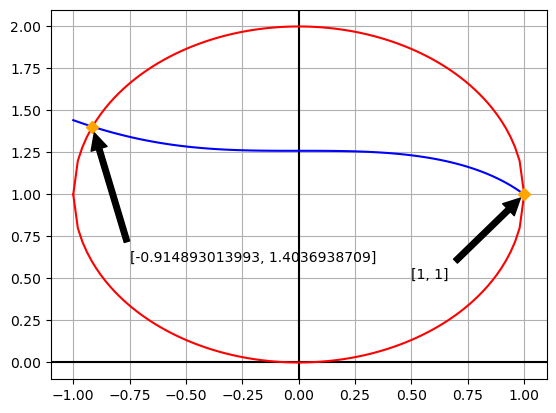

In [17]:
X_span = np.linspace(-1, 1, 100)
Y1_1 = (lambda x: np.sqrt(-x**2+1)+1)(X_span)
Y1_2 = (lambda x: -np.sqrt(-x**2+1)+1)(X_span)
Y2 = (lambda x: (-x**3+2)**(1/3))(X_span)

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid(True)

plt.plot(X_span, Y1_1, label='', color='r')
plt.plot(X_span, Y1_2, label='', color='r')
plt.plot(X_span, Y2, label='', color='b')

plt.plot([true_root3_1[0]], [true_root3_1[1]], label='', color='orange', marker='D')
plt.plot([true_root3_2[0]], [true_root3_2[1]], label='', color='orange', marker='D')

plt.annotate(f'{true_root3_1}', xy=true_root3_1, xytext=(0.5, 0.5), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f'{true_root3_2}', xy=true_root3_2, xytext=(-0.75, 0.6), arrowprops=dict(facecolor='black', shrink=0.05))


Численное решение:

In [18]:
X_init = np.array([np.pi, np.e])

In [19]:
solution = system_newt_solve(func1, func2, X_init, debug=False)
print(f'Решение системы уравнений методом Ньютона: {solution}')

Решение системы уравнений методом Ньютона: [1. 1.]
